In [74]:
import numpy as np
import torch 
import tudatpy 
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt
g = 9.81

In [41]:
def pendulum_eom(time, state, m, l): 
    
    angle, angle_dot = state[0], state[1]
    
    d_angle = angle_dot
    d_angle_dot = -g * np.sin(angle)/l
    
    return np.array([d_angle, d_angle_dot]) 

In [91]:
def pendulum_hamiltonian(states, m, l): 
    
    '''
    Return the hamiltonian of a 2D-pendulum in terms of cartesian coordinates
    and their canonical momentum
    '''
    
    q, p = states[..., 0], states[..., 1]
    T = (p**2)/(2*m*l**2)
    V = m*g*l*(1 - np.cos(q)) 
    
    return T+V

def pendulum_hamilton(time, state, m, l): 
    
    q, p = state[0], state[1] 
    dq = p/(m*l**2)
    dp = -m * g * l * np.sin(q)

    return np.array([dq, dp]) 

In [111]:
def integrate(fun, y0, t0, tf, method = "rk45", step_size = None, rtol = 1e-8, atol = 1e-8, args=None): 
    '''
    Integrate an arbitrary initial value problem with several methods
    '''
    
    if method == "euler": 
        assert  step_size != None,"Time step is not set"
        states, evals = euler(fun, y0, t0, tf, step_size, args)
        
    if method == "symplectic_euler": 
        assert  step_size != None,"Time step is not set"
        states = symplectic_euler(fun, y0, t0, tf, step_size, args)
        
    if method == "rk45": 
        states, evals = rk45(fun, y0, t0, tf, rtol = rtol, atol = atol, args=args)
        
    return states, evals
        
def euler(fun, y0, t0, tf, step_size, args): 
    '''
    Solve an IVP with the euler method
    '''
    
    # Prepare integration
    steps = math.ceil((tf - t0)/step_size)
    states = np.zeros((steps, len(y0)+1)) 
    times = np.linspace(t0, tf, steps) 
    states[0] = np.append([t0], y0)
    evals = len(times) - 1 
    
    # Integrate 
    for i, time in enumerate(times[1:]):
        
        states[i+1, 0] = time
        states[i+1,1:] = states[i,1:] + step_size * fun(time, states[i,1:], *args) 
    
    return states, evals


def symplectic_euler(fun, y0, to, tf, step_size): 
    '''
    Solve an IVP with the symplectic euler method
    '''
    #TODO
    
    return states


def rk45(fun, y0, to, tf, rtol = 1e-8, atol = 1e-8, args=None): 
    '''
    Solve an IVP with the RK4(5) integrator
    '''
    
    # Integrate
    result = solve_ivp(fun, (t0, tf), y0, atol=atol, rtol=rtol, args = args) 
    
    # Extract info
    time = result.t
    y = result.y
    evals = result.nfev
    
    # Put with time in array
    states = np.zeros((len(y[0]), len(y)+1))
    states[:,0] = time
    states[:,1:] = y.T
    
    return states, evals

In [121]:
l = 1
m = 1
y0 = np.array([np.pi/4, 0])
t0 = 0
tf = 10
time_step = 0.01

states, evals = integrate(pendulum_eom, y0, t0, tf, step_size = time_step, method = "euler", args = [l, m])

In [113]:
print(states)

[[ 0.00000000e+00  7.85398163e-01  0.00000000e+00]
 [ 1.00100100e-01  7.85398163e-01 -6.93671752e-01]
 [ 2.00200200e-01  7.16030988e-01 -1.38734350e+00]
 ...
 [ 9.97997998e+01 -1.78792299e+03 -2.48946665e+01]
 [ 9.98998999e+01 -1.79041245e+03 -2.52372772e+01]
 [ 1.00000000e+02 -1.79293618e+03 -2.55228302e+01]]


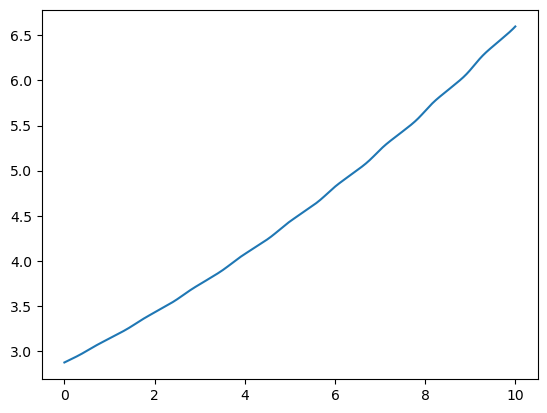

In [123]:
hamiltonian = pendulum_hamiltonian(states[:,1:], m, l)
plt.plot(states[:,0], hamiltonian)

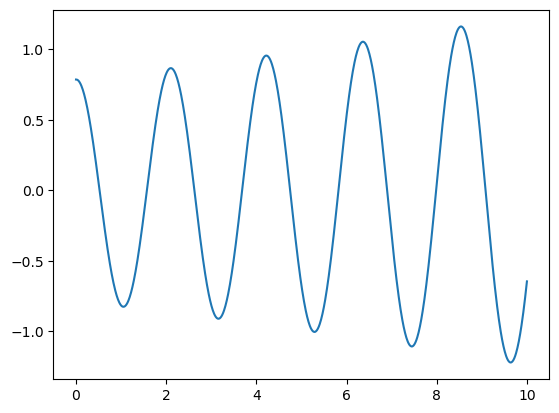

In [122]:
plt.plot(states[:,0], states[:,1]) 

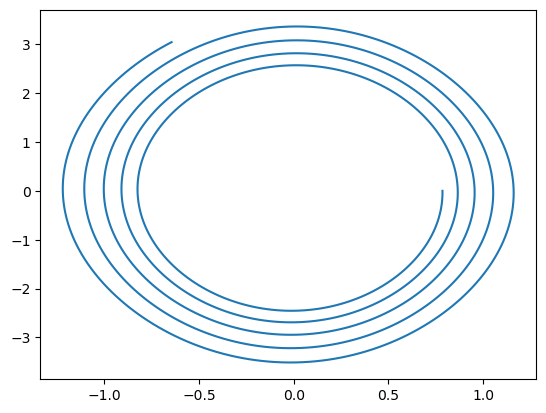

In [124]:
plt.plot(states[:,1], states[:,2])